# IST 652 Final Project

Isha Havaldar, Vidisha Badhe, Trisha Chakraborty

## Life Expectancy (WHO)

Our study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations in this dataset are based on different countries, it will be easier to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.


## Analysis on factors influencing Life Expectancy



Dataset Description

* The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The data-sets are made available to public for the purpose of health data analysis. This dataset is comprised of data from all over the world from various countries aggregated by the World Health Organization (WHO for short). The data is an aggregate of many indicators for a particular country in a particular year. In essence, the data is multiple indicators in a time series separated by country.

* The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website.

* This dataset consists of 22 Columns and 2938 rows.

## Advanced Topic Libraries Used:

* sklearn
* matplotlib
* seaborn


In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats.mstats import winsorize
%matplotlib inline
import warnings
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Dataset 1 taken from Kaggle. It was a structured data
#Importing the first dataset of Life Expectancy which was taken from Kaggle
Dataset1 = pd.read_csv("Life Expectancy Data (1).csv")

In [3]:
#Dataset 2 taken from data.world website. It was a structured data 
#Importing the second dataset of Life Expectancy which was taken from data.world
Dataset2 = pd.read_csv("dataset2.csv")

In [4]:
#Displaying the first 5 rows of Dataset1
Dataset1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
#Changing the Column Names
Dataset2_New = Dataset2.rename(columns={'country': 'Country','year':'Year','life_expectancy':'Life_Expectancy_1'} )

In [6]:
#Displaying the first 5 rows of Dataset2
Dataset2_New.head()

,Country,country_code,region,income_group,Year,Life_Expectancy_1
0,Afghanistan,AFG,South Asia,Low income,2000,55.125878
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2000,45.204780
2,Albania,ALB,Europe & Central Asia,Upper middle income,2000,74.271537
3,United Arab Emirates,ARE,Middle East & North Africa,High income,2000,74.451537
4,Argentina,ARG,Latin America & Caribbean,Upper middle income,2000,73.755805


In [7]:
#There are two columns which are common in the two datasets which are country and year. 
#These two columns are the columns which uniquely identify each row. Hence, we merge the two datasets by on these columns
Merged = pd.merge(Dataset1,Dataset2_New, on=['Country','Year'])

In [8]:
#Displaying the first 5 rows of Merged Dataset
Merged.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,country_code,region,income_group,Life_Expectancy_1
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,584.259210,33736494.0,17.2,17.3,0.479,10.1,AFG,South Asia,Low income,60.717171
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,612.696514,327582.0,17.5,17.5,0.476,10.0,AFG,South Asia,Low income,60.374463
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,631.744976,31731688.0,17.7,17.7,0.470,9.9,AFG,South Asia,Low income,60.028268
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,669.959000,3696958.0,17.9,18.0,0.463,9.8,AFG,South Asia,Low income,59.679610
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,63.537231,2978599.0,18.2,18.2,0.454,9.5,AFG,South Asia,Low income,59.327951


## Data Cleaning

In order to properly clean the data, it is important to understand the variables presented in the data. There are a number of things important to know about each variable:

* Do the variables have missing values? If so, what should be done about them?

* Do the variable have outliers? If so, what should be done about them?

In [9]:
#Changing the column names to names which will have a standard format
Merged.rename(columns = lambda x: x.strip().replace(' ', '_').lower(), inplace=True)

Merged.rename(columns = {'thinness__1-19_years':'thinness_10-19_years','hiv/aids':'hiv'}, inplace=True)

print((f'Number of columns: {len(Merged.columns)}'))
Merged.columns

Number of columns: 26


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'country_code', 'region', 'income_group', 'life_expectancy_1'],
      dtype='object')

### There are few things that must be done concerning missing values:

* Detection of missing values
       * Find nulls
       
* Dealing with missing values
        * Fill nulls? Impute or Interpolate
        * Eliminate nulls?

In [10]:
#To understand the number of null values in the dataset
Merged.isna().sum()

country                              0
year                                 0
status                               0
life_expectancy                      7
adult_mortality                      7
infant_deaths                        0
alcohol                            168
percentage_expenditure               0
hepatitis_b                        498
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  184
diphtheria                          19
hiv                                  0
gdp                                 45
population                         249
thinness_10-19_years                34
thinness_5-9_years                  34
income_composition_of_resources     21
schooling                           17
country_code                         0
region                               0
income_group                         0
life_expectancy_1        

In [11]:
#To get the data types of all columns
Merged.dtypes

country                             object
year                                 int64
status                              object
life_expectancy                    float64
adult_mortality                    float64
infant_deaths                        int64
alcohol                            float64
percentage_expenditure             float64
hepatitis_b                        float64
measles                              int64
bmi                                float64
under-five_deaths                    int64
polio                              float64
total_expenditure                  float64
diphtheria                         float64
hiv                                float64
gdp                                float64
population                         float64
thinness_10-19_years               float64
thinness_5-9_years                 float64
income_composition_of_resources    float64
schooling                          float64
country_code                        object
region     

In [12]:
#Creating a list of column names which have null values and assigning it to missing columns variable

missing_columns = list(Merged.columns[Merged.isnull().any()])
missing_columns

['life_expectancy',
 'adult_mortality',
 'alcohol',
 'hepatitis_b',
 'bmi',
 'polio',
 'total_expenditure',
 'diphtheria',
 'gdp',
 'population',
 'thinness_10-19_years',
 'thinness_5-9_years',
 'income_composition_of_resources',
 'schooling',
 'life_expectancy_1']

In [13]:
#filling missing values on all the columns with interpolation method. 

for col in missing_columns:
    Merged.loc[:, col] = Merged.loc[:, col].interpolate()

In [14]:
#Calculating null values on all columns.
#Here, we get that all the missing values have been removed and replaced by interpolation method
Merged.isna().sum()

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under-five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv                                0
gdp                                0
population                         0
thinness_10-19_years               0
thinness_5-9_years                 0
income_composition_of_resources    0
schooling                          0
country_code                       0
region                             0
income_group                       0
life_expectancy_1                  0
dtype: int64

In [15]:
#Dropped the life_expectancy column which was repetitive 
Merged.drop(columns=['life_expectancy_1'])

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,hiv,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling,country_code,region,income_group
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,AFG,South Asia,Low income
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,AFG,South Asia,Low income
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,AFG,South Asia,Low income
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,AFG,South Asia,Low income
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,AFG,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,ZWE,Sub-Saharan Africa,Low income
2499,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,ZWE,Sub-Saharan Africa,Low income
2500,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,ZWE,Sub-Saharan Africa,Low income
2501,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,ZWE,Sub-Saharan Africa,Low income


## Exploratory Data Analysis


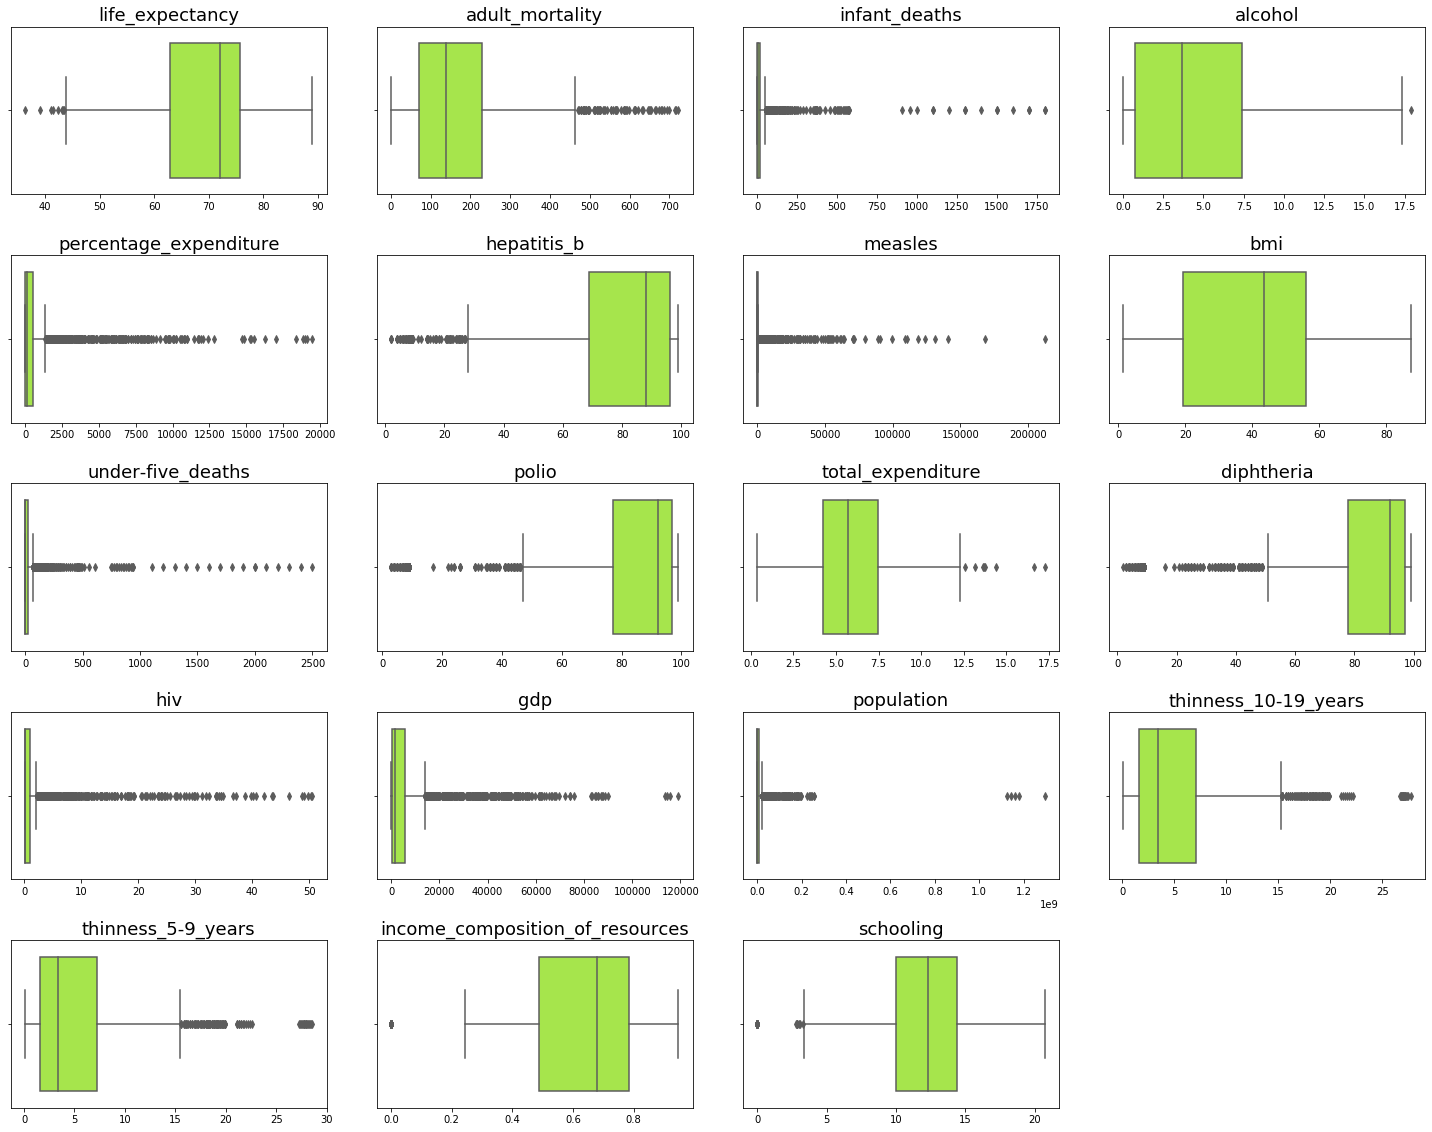

In [16]:
#let's look at the distributions of our continuous variables
num_cols = ['life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']

# detecting outliers
plt.figure(figsize=(20,60))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 4, i+1)
    sns.boxplot(Merged[col], color=('xkcd:lime'))
    plt.title(f'{col}', fontsize=18)
    plt.xlabel('')

plt.tight_layout()
plt.show()


### We found the outliers. We need to handle them to have more reliable analysis. We have 2 ways to handle to outliers.

* Dropping : Dropping will result in losing data. Hence, it will restrict us from gaining powerful and correct insights.

* Winsorization : It limits the values of the outliers. We can cap the outliers with the value of specified percentile. In that way, we can limit outliers affect on our analysis.


In [17]:
# dropping mistakes in the data collection per the reasoning above
Merged_New = Merged[(Merged.infant_deaths<1000) & (Merged.measles<1000) & (Merged['under-five_deaths']<1000)]

# winsorizations
Merged_New['winz_life_exp'] = winsorize(Merged_New['life_expectancy'], (0.10,0.0))
Merged_New['winz_tot_exp'] = winsorize(Merged_New['total_expenditure'], (0.0,0.10))
Merged_New['winz_adult_mort'] = winsorize(Merged_New['adult_mortality'], (0.0,0.10))
Merged_New['winz_polio'] = winsorize(Merged_New['polio'], (0.15,0.0))
Merged_New['winz_diph'] = winsorize(Merged_New['diphtheria'], (0.10,0.0))
Merged_New['winz_hepb'] = winsorize(Merged_New['hepatitis_b'], (0.15,0.0))
Merged_New['winz_thin_1019_yr'] = winsorize(Merged_New['thinness_10-19_years'], (0.0,0.10))
Merged_New['winz_thin_59_yr'] = winsorize(Merged_New['thinness_5-9_years'], (0.0,0.10))
Merged_New['winz_income_comp'] = winsorize(Merged_New['income_composition_of_resources'], (0.10,0.0))
Merged_New['winz_schooling'] = winsorize(Merged_New['schooling'], (0.10,0.05))
Merged_New['winz_under5_deaths'] = winsorize(Merged_New['under-five_deaths'], (0.0, 0.20))
Merged_New['winz_infant_deaths'] = winsorize(Merged_New['infant_deaths'], (0.0, 0.15))
Merged_New['winz_hiv/aids'] = winsorize(Merged_New['hiv'], (0.0, 0.21))
Merged_New['winz_measles'] = winsorize(Merged_New['measles'], (0.0, 0.17))

# transformations
Merged_New['winz_log_gdp'] = winsorize(np.log(Merged_New['gdp']), (0.10, 0.0))
Merged_New['winz_log_population'] = winsorize(np.log(Merged_New['population']), (0.10, 0.0))
Merged_New['log_pct_exp'] = np.log(Merged_New['percentage_expenditure'])

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Isha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [18]:
Merged_New.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,winz_thin_59_yr,winz_income_comp,winz_schooling,winz_under5_deaths,winz_infant_deaths,winz_hiv/aids,winz_measles,winz_log_gdp,winz_log_population,log_pct_exp
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.9,0.476,10.0,19,22,0.1,154,6.417870,12.699494,4.297606
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.9,0.470,9.9,19,22,0.1,154,6.448486,17.272826,4.293458
11,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466,...,8.9,0.394,8.3,19,22,0.1,154,5.389717,16.998510,2.727596
12,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798,...,8.9,0.394,8.3,19,22,0.1,154,5.291940,14.676226,2.405958
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,1.3,0.762,14.2,0,0,0.1,0,8.282541,10.296273,5.899829


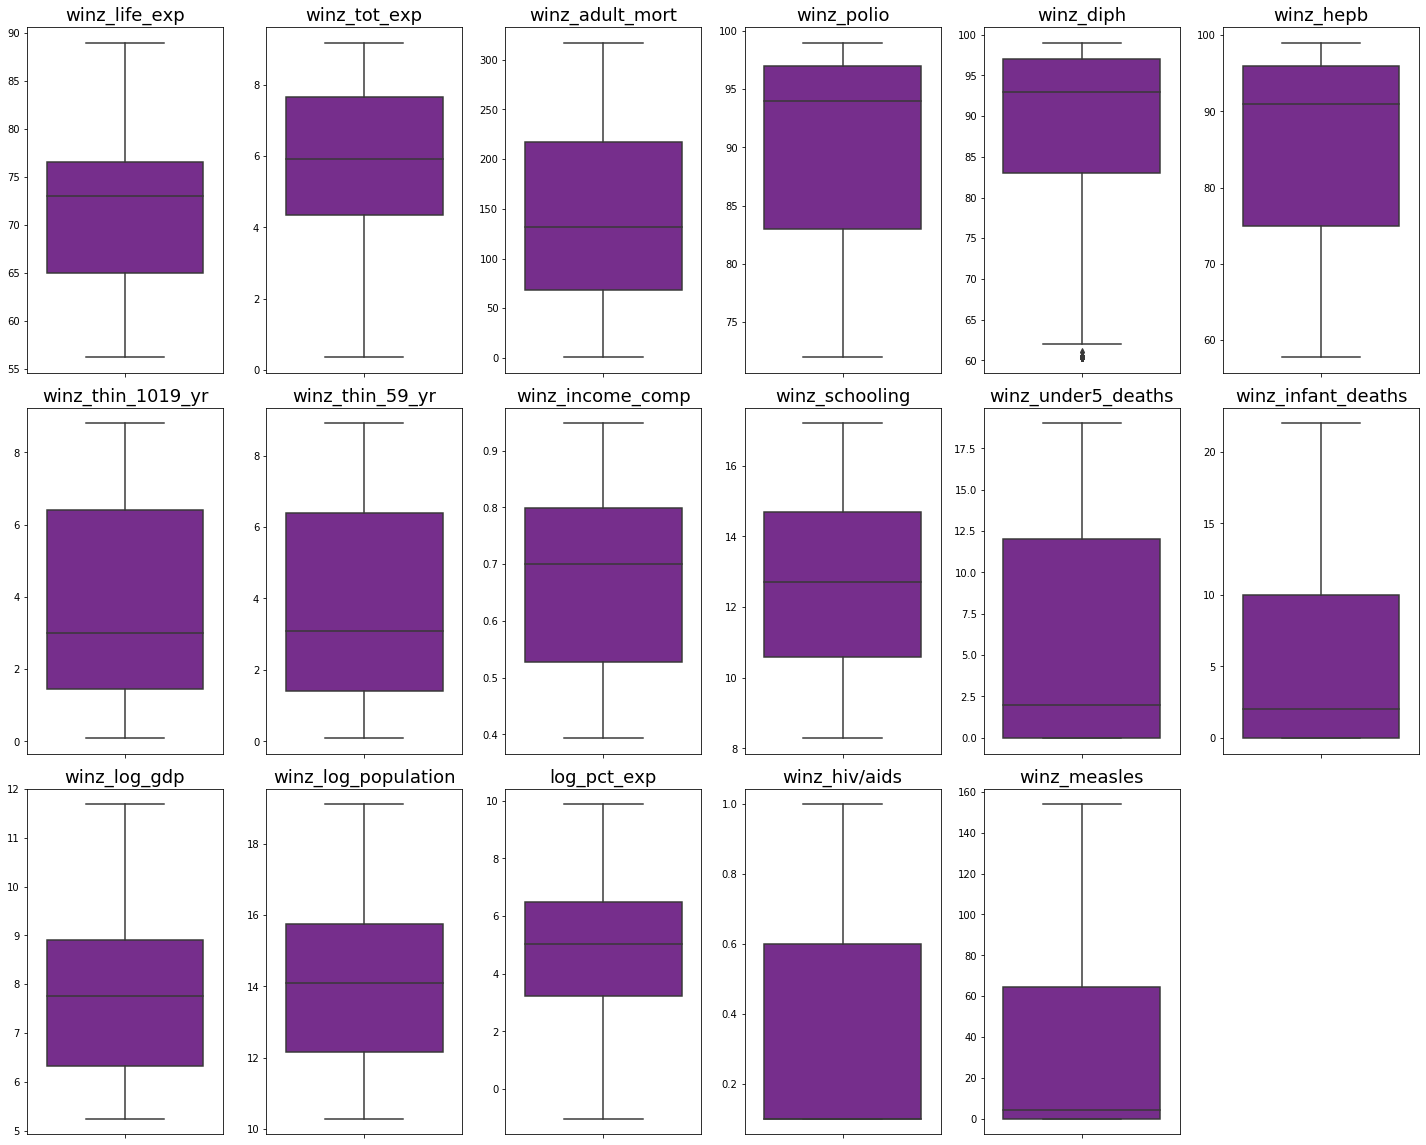

In [19]:
# reinspecting to see how outliers were handled
adj_num_cols = [ 'winz_life_exp', 'winz_tot_exp',
       'winz_adult_mort', 'winz_polio', 'winz_diph', 'winz_hepb',
       'winz_thin_1019_yr', 'winz_thin_59_yr', 'winz_income_comp',
       'winz_schooling', 'winz_under5_deaths', 'winz_infant_deaths',
       'winz_log_gdp', 'winz_log_population', 'log_pct_exp', 'winz_hiv/aids',
       'winz_measles']

plt.figure(figsize=(20,90))
for i, col in enumerate(adj_num_cols):
    plt.subplot(len(adj_num_cols), 6, i+1)
    sns.boxplot(y=Merged_New[col], color=('xkcd:purple'))
    plt.title(f'{col}', fontsize=18)
    plt.ylabel('')

plt.tight_layout()
plt.show()
#all outliers have been dealt with

### Developed & Developing Countries Life Expectency Comparison

In [36]:
import chart_studio.plotly as py
import plotly.graph_objs as go

#creating a scatter plot for devepoled country(Age, year and life expectancy)
trace1 = {"x": Merged.year, 
          "y": [ 80.709375, 81.1375, 80.68125, 80.44375, 80.70625, 80.146875, 79.584375, 78.93125, 79.3, 79.13125, 78.590625, 78.384375, 75.528125, 75.140625, 74.725, 74.403125 ], 
          "mode": "markers", 
          "name": "Developed", 
          "type": "scatter"
}

#creating a scatter plot for developing country(Age, year and life expectancy)
trace2 = {"x": Merged.year, 
          "y": [  69.69006623, 69.50198675, 69.23443709, 68.89801325, 68.52384106, 67.90860927, 67.89403974, 67.41390728, 66.86092715, 66.45033113, 66.00927152, 65.37086093, 65.20662252, 65.19072848, 65.00993377, 64.61986755  ], 
          "marker": {"color": "orange", "size": 12}, 
          "mode": "markers", 
          "name": "Developing", 
          "type": "scatter", 
}

#combining the two scatter plots and labeling the xaxis and yaxis
data = [trace1, trace2]
layout = {"title": "Developed & Developing Countries Life Expectency Comparison", 
          "xaxis": {"title": "Year", }, 
          "yaxis": {"title": "Avarage Age"}}

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic_dot-plot')

In [21]:
#making two dataframe for develpoed and developing countries
dfded = Merged_New[Merged_New.status == "Developed"]
dfding = Merged_New[Merged_New.status == "Developing"]

### GDP Per Capita and Life Expectancy Correlation

In [22]:
#creating a scatter plot for developing country(gdp and life expectancy)
trace0 = go.Scatter(
    x = dfded.winz_log_gdp,
    y = dfded.winz_life_exp,
    name = 'Developed',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

#creating a scatter plot for developed country(gdp and life expectancy)
trace1 = go.Scatter(
    x = dfding.winz_log_gdp,
    y = dfding.winz_life_exp,
    name = 'Developing',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = ' rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
        )
    )
)

#combining the two scatter plots and labeling the xaxis and yaxis
data = [trace0, trace1]

layout = {"title": "GDP Per Capita and Life Expectancy Correlation", 
          "xaxis": {"title": "GDP", }, 
          "yaxis": {"title": "Life Expectancy"}}

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

### Education and Life Expectancy Correlation

In [23]:
booleandfed = dfded.winz_schooling > 2
booleandfing= dfding.winz_schooling > 2
dfded[booleandfed]
dfding[booleandfing]

#creating a scatter plot for developed country(schooling and life expectancy)
trace0 = go.Scatter(
    x = dfded[booleandfed].winz_schooling,
    y = dfded[booleandfed].winz_life_exp,
    name = 'Developed',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

#creating a scatter plot for developed country(schooling and life expectancy)
trace1 = go.Scatter(
    x = dfding[booleandfing].winz_schooling,
    y = dfding[booleandfing].winz_life_exp,
    name = 'Developing',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = ' rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
        )
    )
)

#combining the two scatter plots and labeling the xaxis and yaxis
data = [trace0, trace1]

layout = {"title": "Education and Life Expectancy Correlation", 
          "xaxis": {"title": "Schooling", }, 
          "yaxis": {"title": "Life Expectancy"}}

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')


### Region, Income Group and Life Expectancy Correlation

In [24]:
#Grouping data based on region and income group and calculating the average life expectancy
plot_LE = Merged_New.groupby(['region','income_group']).agg({'winz_life_exp':['mean']})
plot_LE.columns = ['life_expectancy_mean']
plot_LE

life_expectancy_mean
region                     income_group                             
East Asia & Pacific        High income                     80.501333
                           Lower middle income             66.291892
                           Upper middle income             71.750806
Europe & Central Asia      High income                     79.556887
                           Lower middle income             70.130303
                           Upper middle income             72.209497
Latin America & Caribbean  High income                     74.982813
                           Low income                      61.112500
                           Lower middle income             72.479687
                           Upper middle income             73.532879
Middle East & North Africa High income                     76.635484
                           Lower middle income             70.201389
                           Upper middle income             73.078000
North America              High income                     81.687500
South Asia                 Low income                      61.500000
                           Lower middle income             69.202857
                           Upper middle income             75.620000
Sub-Saharan Africa         High income                     72.375000
                           Low income                      58.432090
                           Lower middle income             61.182308
                           Upper middle income             59.610606

Text(0, 0.5, 'Life Expectancy')

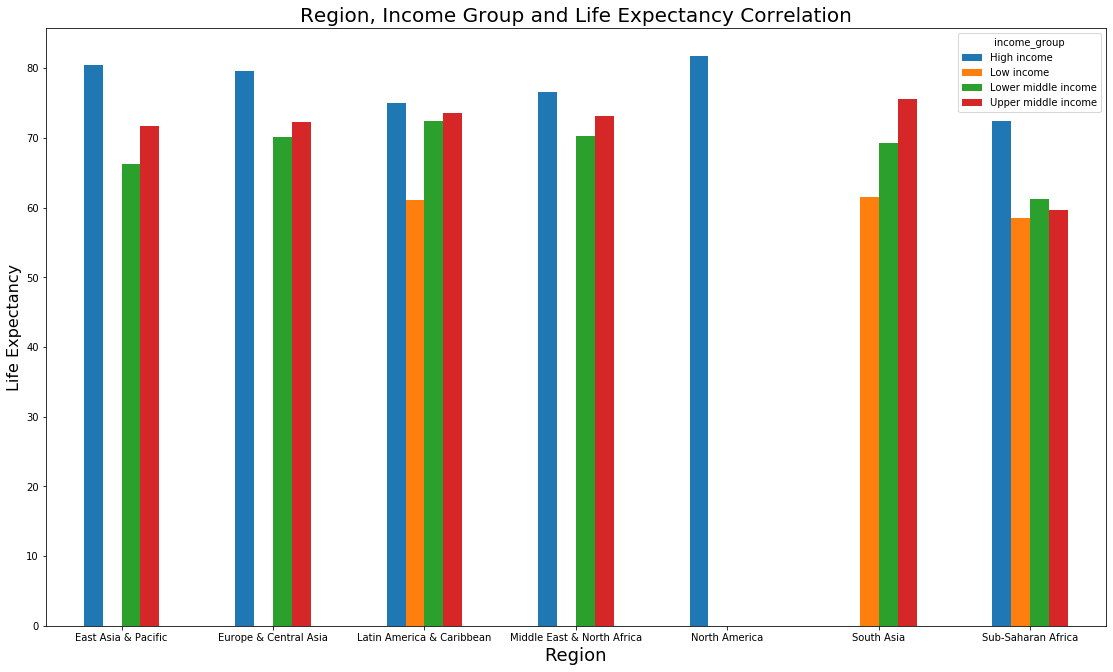

In [25]:
#ploting the dataframe to display region, income and average life expectancy
plot_LE.unstack()['life_expectancy_mean'].plot.bar(rot=0,figsize=(19,11))
plt.title('Region, Income Group and Life Expectancy Correlation', fontsize=20)
plt.xlabel('Region', fontsize=18)
plt.ylabel('Life Expectancy', fontsize=16)

## What are the predicting variables affecting the life expectancy?

## Correlation

In [26]:
Merged_New.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'country_code', 'region', 'income_group', 'life_expectancy_1',
       'winz_life_exp', 'winz_tot_exp', 'winz_adult_mort', 'winz_polio',
       'winz_diph', 'winz_hepb', 'winz_thin_1019_yr', 'winz_thin_59_yr',
       'winz_income_comp', 'winz_schooling', 'winz_under5_deaths',
       'winz_infant_deaths', 'winz_hiv/aids', 'winz_measles', 'winz_log_gdp',
       'winz_log_population', 'log_pct_exp'],
      dtype='object')

In [27]:
Merged_New.rename(columns = {'winz_hiv/aids':'winz_hiv'}, inplace=True)

C:\Users\Isha\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
#making a list of numerical columns
column = list(Merged_New.columns)[26:]

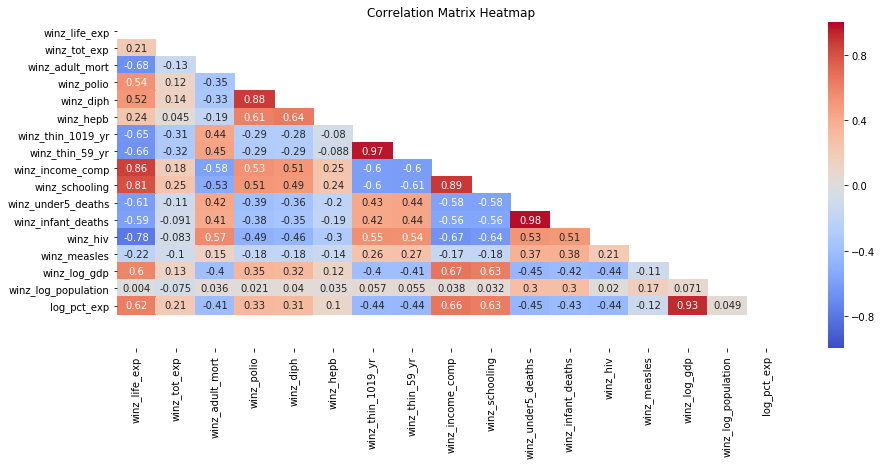

In [29]:
#making a correlation matrix andploting a heat map
mask = np.triu(Merged_New[column].corr())
plt.figure(figsize=(15,6))
sns.heatmap(Merged_New[column].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(19, 0)
plt.title('Correlation Matrix Heatmap')
plt.show()

### The above heatmap is very useful! It very easily displays a number of important correlations between variables. Some general takeaways from the graphic above:

Life Expectancy (target variable) appears to be relatively highly correlated (negatively or positively) with:

* Adult Mortality (negative)

* HIV/AIDS (negative)

* Income Composition of Resources (positive)

* Schooling (positive)

* Life expectancy (target variable) is extremely lowly correlated to population (nearly no correlation at all)

* Infant deaths and Under Five deaths are extremely highly correlated

* Percentage Expenditure and GDP are relatively highly correlated

* Hepatitis B vaccine rate is relatively positively correlated with Polio and Diphtheria vaccine rates

* Polio vaccine rate and Diphtheria vaccine rate are very positively correlated

* HIV/AIDS is relatively negatively correlated with Income Composition of Resources

* Thinness of 5-9 Year olds rate and Thinness of 10-15 Year olds rate is extremely highly correlated

* Income Composition of Resources and Schooling are very highly correlated

### What is the impact of Immunization coverage on life Expectancy?

* From the correlation matrix we understood that there is a very low correlation between the immunization coverages - Polio, Hepatitis B and Diphtheria


## Linear Regression

### Adult Mortality VS Life Expectancy

## How does Adult mortality rates affect life expectancy?

In [30]:
#defining the linear function 
linear_reg = LinearRegression()

#assigning the depent and independent variables
x = Merged_New.winz_adult_mort.values.reshape(-1,1)
y = Merged_New['winz_life_exp'].values.reshape(-1,1)          

#fitting the regression model
linear_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

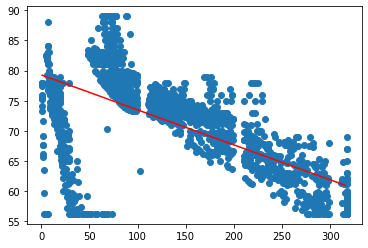

Mean Absolute Error:  106.97695141369171
Mean Squared Error:  17136.166942825497
Root Mean Squared Error:  130.90518302506396


In [31]:
# Building a scatter plot of adult morttality vs life expectancy
x_array = np.arange(min(Merged_New.winz_adult_mort),max(Merged_New.winz_adult_mort)).reshape(-1,1)  
plt.scatter(x,y)
y_head = linear_reg.predict(x_array)                                 
plt.plot(x_array,y_head,color="red")
plt.show()

#printing the error
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))

### Income Composition of Resources VS Life Expectancy

In [32]:
#defining the linear function 
linear_reg_2 = LinearRegression()

#assigning the depent and independent variables
x = Merged_New.winz_income_comp.values.reshape(-1,1)
y = Merged_New['winz_life_exp'].values.reshape(-1,1)          

#fitting the regression model
linear_reg_2.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

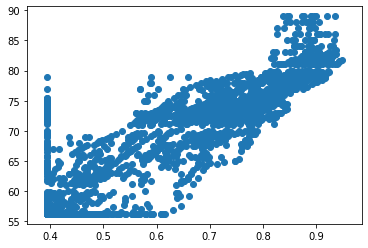

Mean Absolute Error:  58.64494689195974
Mean Squared Error:  3439.2297959607786
Root Mean Squared Error:  58.64494689195974


In [33]:
# Building a scatter plot of income composition vs life expectancy
x_array = np.arange(min(Merged_New.winz_income_comp),max(Merged_New.winz_income_comp)).reshape(-1,1)  
plt.scatter(x,y)
y_head = linear_reg_2.predict(x_array)                                 
plt.plot(x_array,y_head,color="red")
plt.show()

#printing the error
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))

### Schooling VS Life Expectancy

## What is the impact of schooling on the lifespan of humans?

In [34]:
#defining the linear function 
linear_reg_3 = LinearRegression()

#assigning the depent and independent variables
x = Merged_New.winz_schooling.values.reshape(-1,1)
y = Merged_New['winz_life_exp'].values.reshape(-1,1)          

#fitting the regression model
linear_reg_3.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

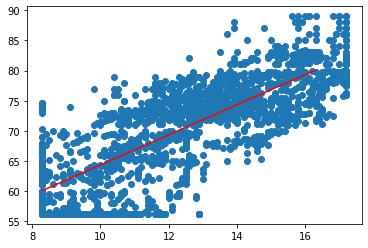

Mean Absolute Error:  57.772554200920894
Mean Squared Error:  3352.6737945326668
Root Mean Squared Error:  57.90227797360538


In [35]:
# Building a scatter plot of schooling vs life expectancy
x_array = np.arange(min(Merged_New.winz_schooling),max(Merged_New.winz_schooling)).reshape(-1,1)  
plt.scatter(x,y)
y_head = linear_reg_3.predict(x_array)                                 
plt.plot(x_array,y_head,color="red")
plt.show()

#printing the error
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))